<h1> A1: Predicting Car Price</h1>

In this assignment, I will solve a problem, i.e., Chaky company makes some car but he has difficulty setting the price for the car. 
To support that I will create a simple web-based car price prediction system.

This is a regression problem trying to predict car price.
<br>
<ul>The followings describe the feautres:
<br></br>
<b>
<li>name : car brand
<li>year : manufactured year
<li>selling_price : selling price that I will predict
<li>km_driven : total driven km
<li>fuel : type of fuel used by the car
<li>seller_type : type of selling people
<li>transmission : it is about auto or manual
<li>owner : type of owner
<li>mileage : how many mile can be reach within an hour
<li>engine : engine power
<li>max_power
<li>torque
<li>seats : total seats of the car
</b>
</ul>

<h2> Task1. Preparing the datasets </h2>

<h3> Importing Libraries </h3>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__, sns.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2', '0.12.2')

<h3>1. Load Data</h3>

In [6]:
#read csv
df = pd.read_csv('Cars.csv')

In [7]:
#print the first row of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
#check the shape of the data
df.shape 

(8128, 13)

In [9]:
#statistical info Hint:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
#check data types of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [116]:
#check the column names
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

<h3>2. Exploratory Data Analysis</h3>

EDA is an essential step to inspect the data, so to better understand nature of the given data.

<h4> Renaming </h4>

In [12]:
#Rename "Name" Column to "brand", I will not rename for the rest columns as it is already perfect.
df.rename (
    columns= {'name' : 'brand'}, inplace = True
)

In [13]:
#check the columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h4> Label Encoding </h4>

Now, I would like to change feature "owner" values to numerical values by mapping <b> First Owner = 1, ..., Test Drive Cars = 5

In [14]:
#check the owner column unique value
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [15]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['owner'] = le.fit_transform (df['owner'])+1
df['owner'].unique()

array([1, 3, 5, 2, 4])

Again, I will do label encoding for "transmission" feature

In [16]:
#check for my array
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

<!-- I will do label encoding for Year also. -->

In [18]:
# df['year'].unique()

In [19]:
# df['year'] = le.fit_transform (df['year'])+1
# df['year'].unique()

<h4> Other Preparation </h4>

For feature "fuel", I will remove all rows with the value 'CNG' and 'LPG'

In [20]:
df.shape

(8128, 13)

In [21]:
# Delete rows where 'fuel' == 'CNG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'CNG'].index, inplace = True)

In [22]:
#check after dropping CNG
df.shape

(8071, 13)

In [23]:
# Delete rows where 'fuel' == 'LPG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'LPG'].index, inplace = True)

In [24]:
#check after dropping LPG
df.shape

(8033, 13)

For feature 'mileage', I will remove 'kmpl' using df.mileage.str.split and 
convert column to numerical type (e.g. float)

In [25]:
#usage of split
# series.str.split (pad = None, *, n = -1, expand = flase, regex = None)

#df with split value of columns (set expand = True: it will return a df after splitted the values; n=1: total separations will be 1 time)
df1 = df["mileage"].str.split (" ",n = 1, expand = True)

#making the splitted 0 column as 'mileage' features
df['mileage'] = df1[0]

In [26]:
#check the datatype of a series
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [27]:
#convert 'mileage' feature's DType to float
df['mileage']=df['mileage'].astype('float64')

In [28]:
#check the datatype after changing to float
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

For feature 'engine', I will remove 'CC' and convert it datatype to numerical (float) 

In [29]:
#check feature 'engine'
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [30]:
#remove CC of engine and put the results into temporary dataframe
df2 = df['engine'].str.split (' ', n = 1, expand = True)
df2

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [31]:
#update the value: update the resulted df[0] to the original df
df['engine']  = df2[0]

#check the df['engine']
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [32]:
#convert dtype of 'engin' to float
df['engine'] = df['engine'].astype('float64')
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

For feature 'maxpower', I will repeat the same steps as what I did to feature 'engine'

In [33]:
#check 'maxpower'
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [34]:
#remove bhp and store to temp df
df3 = df['max_power'].str.split (" ", n = 1, expand = True)
df3

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [35]:
#replace column 0 of df3 to original df
df['max_power'] = df3[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [36]:
#change dtype of max_power
df['max_power'] = df['max_power'].astype ("float64")
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

For feature 'brand', I will take only the first word

In [37]:
#check the brand
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [38]:
#split with " " and store the result to temp df
df4 = df['brand'].str.split (" ", n = 1, expand = True)
df4

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII
...,...,...
8123,Hyundai,i20 Magna
8124,Hyundai,Verna CRDi SX
8125,Maruti,Swift Dzire ZDi
8126,Tata,Indigo CR4


In [39]:
#replace temp to original df
df['brand'] = df4[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

do label encoding for "brand"

In [40]:
df['brand'].unique()
df['brand'] = le.fit_transform(df['brand'])
df['brand'].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

Drop the feature "torque"

In [41]:
#drop
df = df.drop (columns = ['torque'])

#check the columns
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

I will remove some samples of which 'owner' == test driver car

In [42]:
df.shape

#check my df['owner'] sample to make sure it is correct or not
df[df['owner'] == 3]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1,27,2014,370000,120000,Diesel,Individual,1,3,21.14,1498.0,103.52,5.0
7,20,2001,45000,5000,Petrol,Individual,1,3,16.10,796.0,37.00,4.0
10,26,2014,500000,68000,Diesel,Individual,1,3,19.01,1461.0,108.45,5.0
11,20,2005,92000,100000,Petrol,Individual,1,3,17.30,993.0,60.00,5.0
12,20,2009,280000,140000,Diesel,Individual,1,3,19.30,1248.0,73.90,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8104,10,2006,160000,70000,Petrol,Individual,1,3,16.90,1497.0,100.00,5.0
8105,10,2004,135000,120000,Petrol,Individual,1,3,13.00,1343.0,90.00,5.0
8106,11,2012,450000,128000,Diesel,Individual,1,3,22.32,1582.0,126.32,5.0
8121,20,2013,260000,50000,Petrol,Individual,1,3,18.90,998.0,67.10,5.0


In [43]:
#drop the samples for test drive car
df.drop(df[df['owner'] == 3].index, inplace = True)

In [44]:
#check the shape
df.shape

# df[df['owner'] == 3]

(5960, 12)

For 'sellingprice', I will transform using the log transform as it is a big number

In [45]:
#check selling_price
df['selling_price']

0       450000
2       158000
3       225000
4       130000
5       440000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 5960, dtype: int64

In [46]:
#log_transform for selling_price
df['selling_price'] = np.log(df['selling_price'])
df['selling_price']

0       13.017003
2       11.970350
3       12.323856
4       11.775290
5       12.994530
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 5960, dtype: float64

In [47]:
#check the final dataframe
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,Diesel,Individual,1,1,23.40,1248.0,74.00,5.0
2,10,2006,11.970350,140000,Petrol,Individual,1,5,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,Diesel,Individual,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,Petrol,Individual,1,1,16.10,1298.0,88.20,5.0
5,11,2017,12.994530,45000,Petrol,Individual,1,1,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,12.676076,110000,Petrol,Individual,1,1,18.50,1197.0,82.85,5.0
8124,11,2007,11.813030,119000,Diesel,Individual,1,2,16.80,1493.0,110.00,5.0
8125,20,2009,12.853176,120000,Diesel,Individual,1,1,19.30,1248.0,73.90,5.0
8126,28,2013,12.577636,25000,Diesel,Individual,1,1,23.57,1396.0,70.00,5.0


<h4>2.1 Univariate Analysis</h4>

also known as: Single variable exploratory data analysis

<h5>Couontplot</h5>

<Axes: xlabel='selling_price', ylabel='count'>

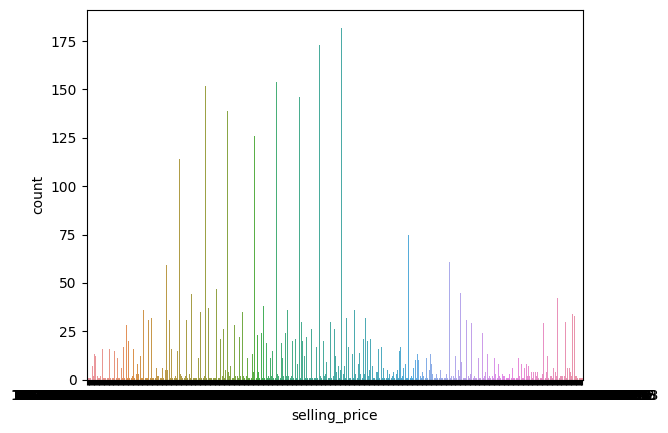

In [48]:
sns.countplot (data = df, x = 'selling_price')

<Axes: xlabel='fuel', ylabel='count'>

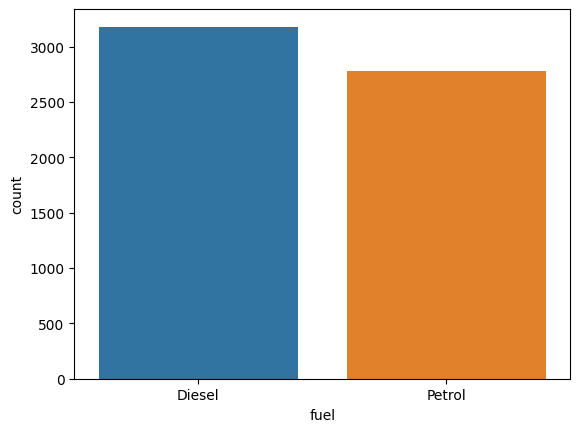

In [49]:
sns.countplot (data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

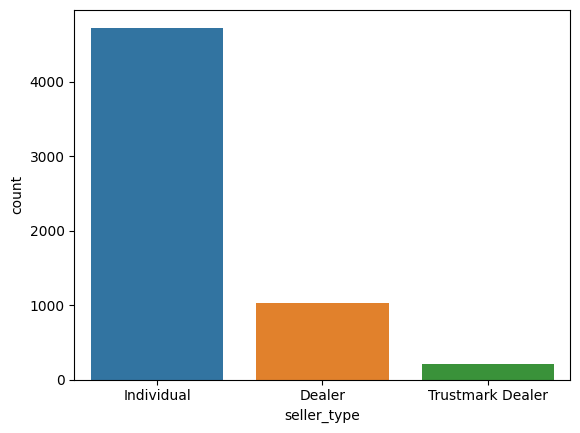

In [50]:
sns.countplot (data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

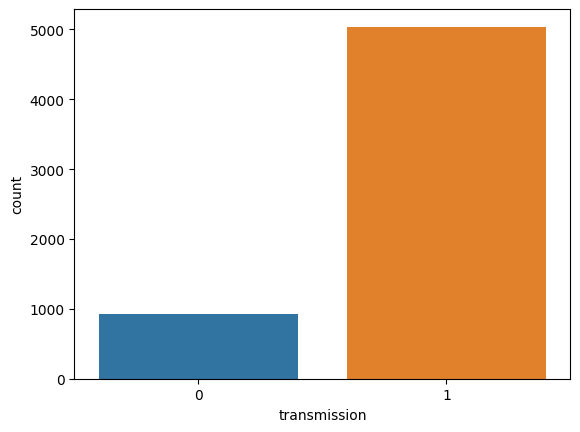

In [51]:
sns.countplot (data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

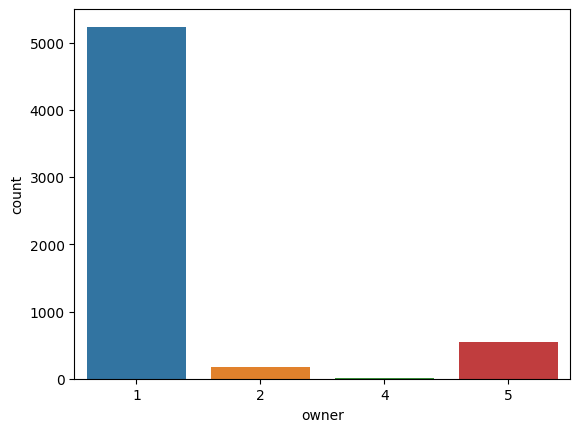

In [52]:
sns.countplot (data = df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

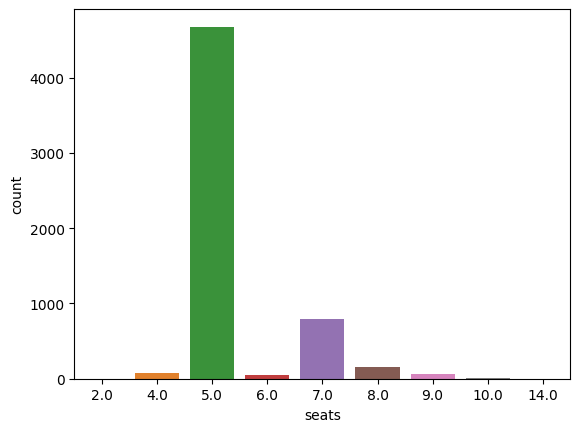

In [53]:
sns.countplot (data = df, x = 'seats')

<Axes: xlabel='brand', ylabel='count'>

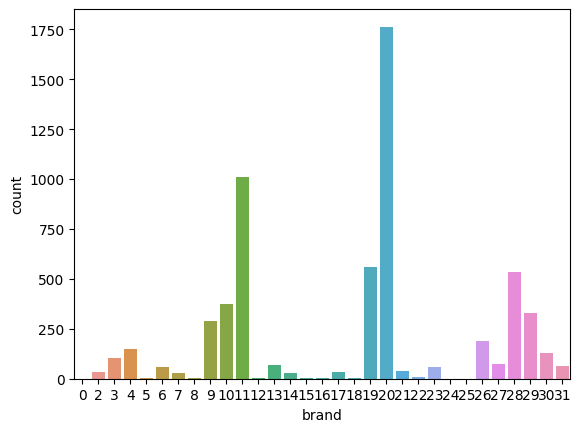

In [54]:
sns.countplot (data = df, x = 'brand')

<Axes: xlabel='year', ylabel='count'>

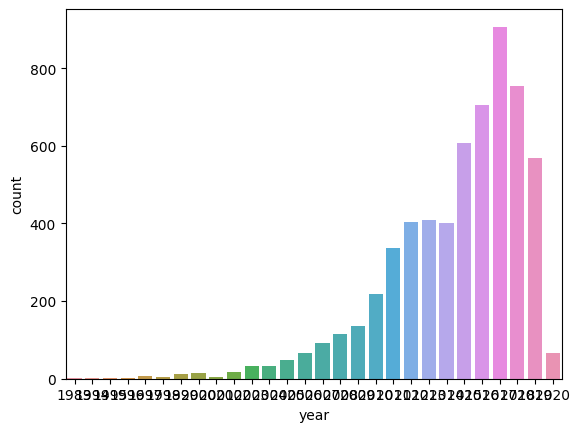

In [55]:
sns.countplot (data = df, x = 'year')

<h5>Distribution Plot</h5>

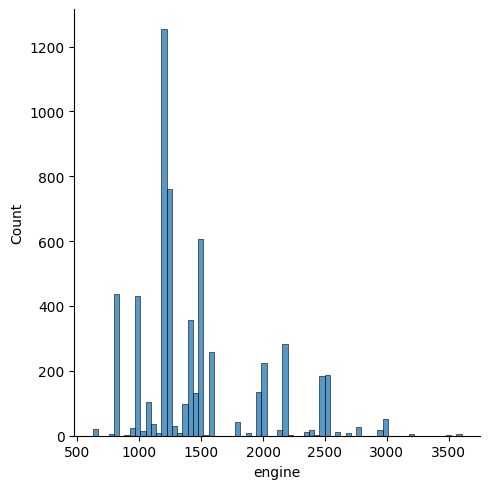

In [56]:
sns.displot(data = df, x = 'engine')

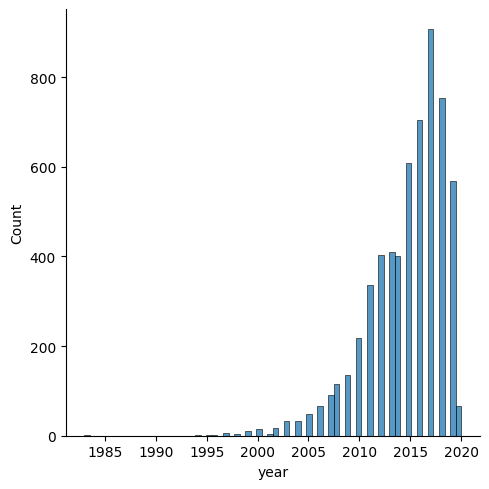

In [57]:
sns.displot(data = df, x = 'year')

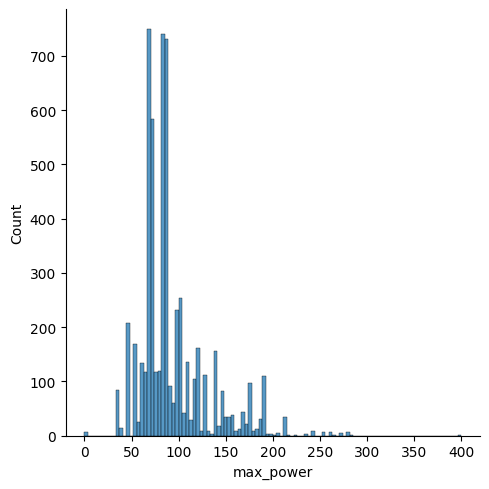

In [58]:
sns.displot(data = df, x = 'max_power')

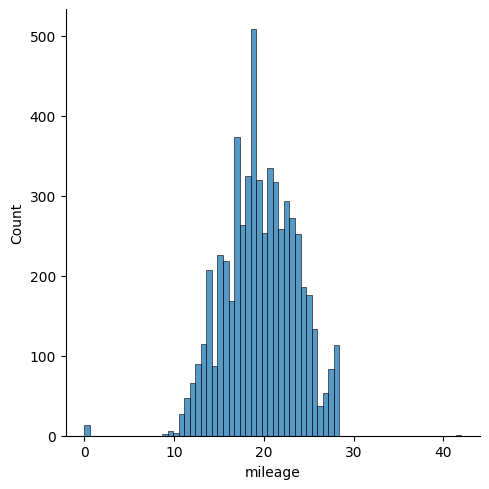

In [59]:
sns.displot(data = df, x = 'mileage')

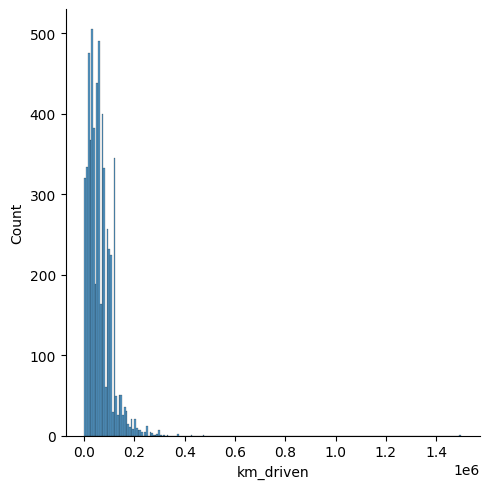

In [60]:
sns.displot(data = df, x = 'km_driven')

<h4>2.2 Multivariate analysis</h4>

Multiple variable exploratory data analysis

<h5>Boxplot</h5>

Text(0.5, 0, 'brand')

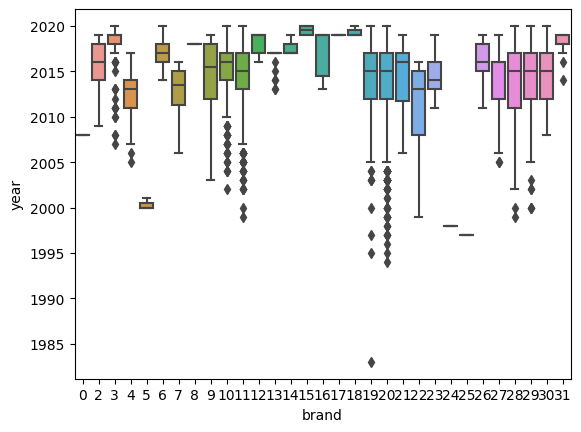

In [61]:
sns.boxplot (x = df['brand'], y = df['year']);
plt.ylabel("year")
plt.xlabel("brand")

Text(0, 0.5, 'Fuel')

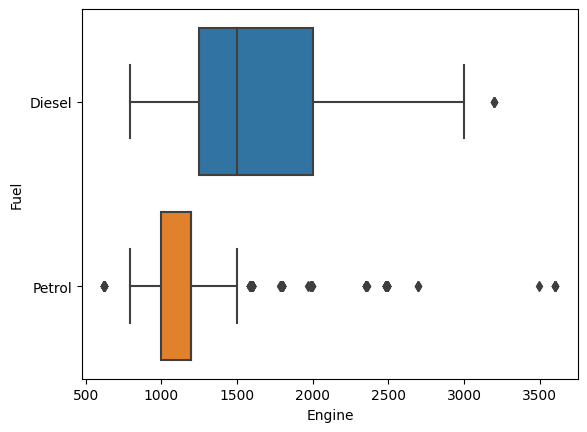

In [62]:
sns.boxplot (x = df['engine'], y = df['fuel']);
plt.xlabel("Engine")
plt.ylabel("Fuel")

Text(0, 0.5, 'selling price')

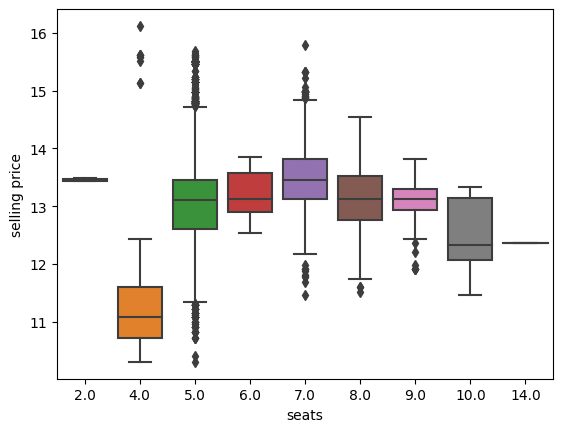

In [63]:
sns.boxplot (x = df['seats'], y = df['selling_price']);
plt.xlabel("seats")
plt.ylabel("selling price")

Text(0, 0.5, 'selling price')

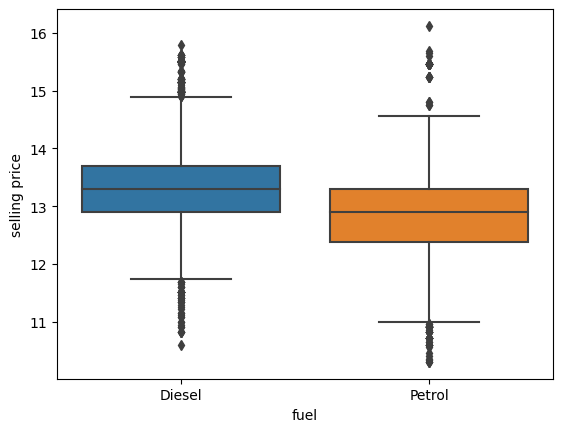

In [64]:
sns.boxplot (x = df['fuel'], y = df['selling_price']);
plt.xlabel("fuel")
plt.ylabel("selling price")

Text(0, 0.5, 'selling_price')

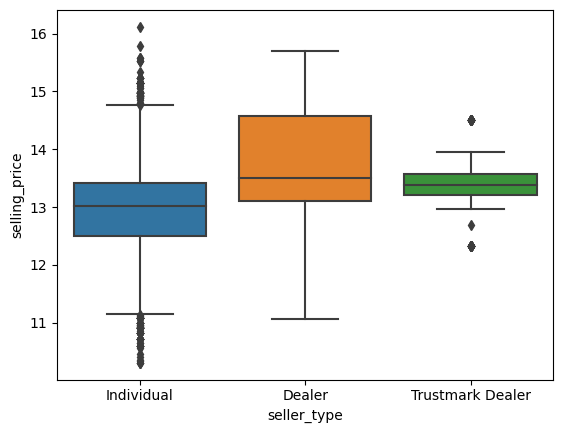

In [65]:
sns.boxplot (x = df['seller_type'], y = df['selling_price']);
plt.xlabel("seller_type")
plt.ylabel("selling_price")

<h5> Scatterplot </h5>

<Axes: xlabel='year', ylabel='selling_price'>

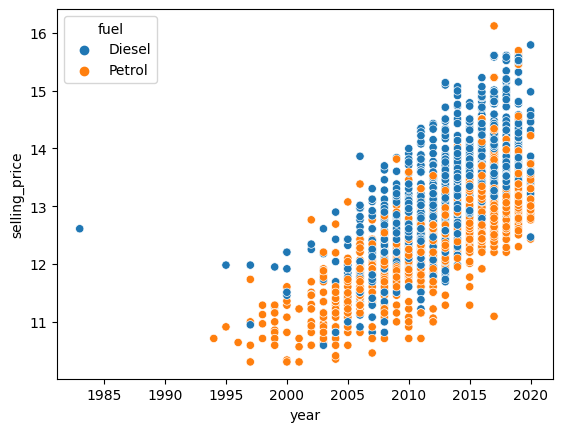

In [66]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['fuel'])
#diesel car are more expensive than petrol car

<Axes: xlabel='year', ylabel='selling_price'>

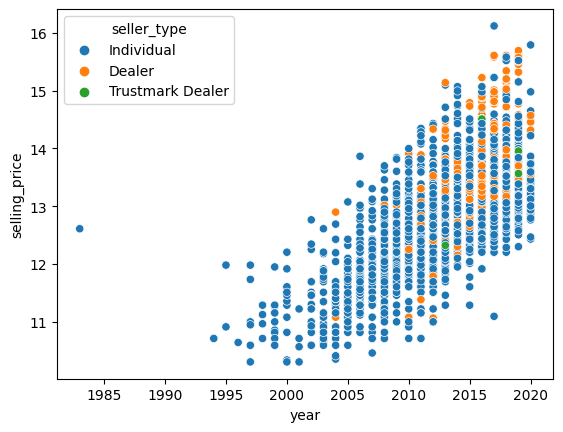

In [67]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['seller_type'])

<Axes: xlabel='year', ylabel='selling_price'>

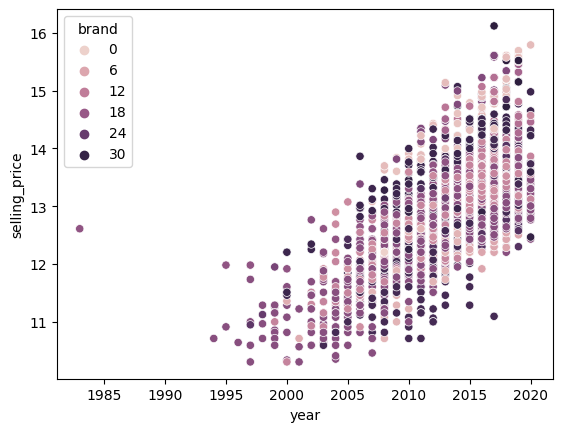

In [68]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['brand'])

<Axes: xlabel='year', ylabel='selling_price'>

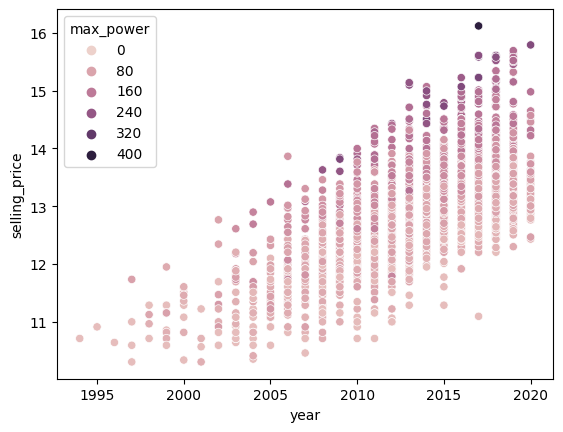

In [69]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['max_power'])

<Axes: xlabel='year', ylabel='selling_price'>

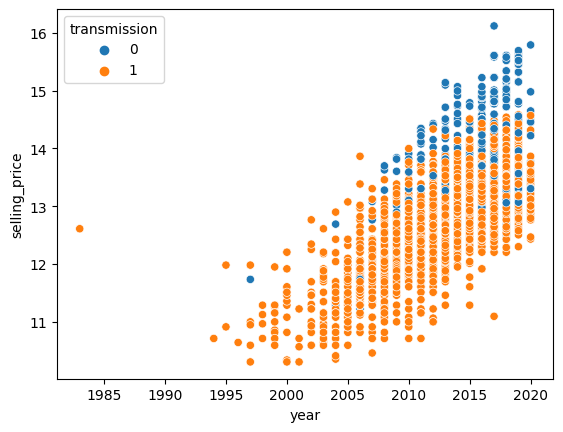

In [70]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

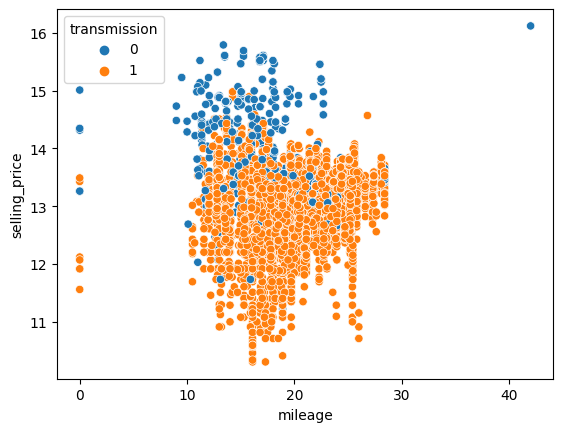

In [71]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='max_power', ylabel='selling_price'>

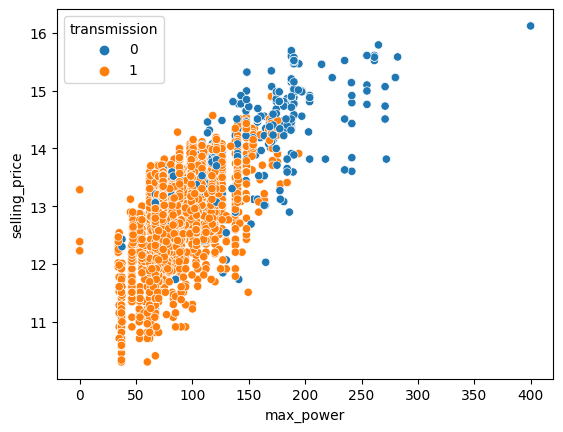

In [72]:
sns.scatterplot (x = df ['max_power'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='brand', ylabel='selling_price'>

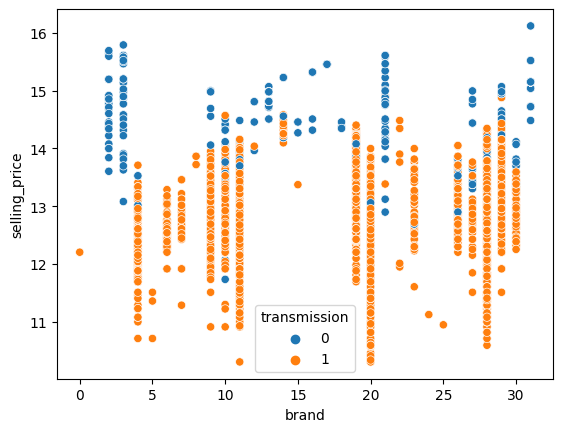

In [73]:
sns.scatterplot (x = df ['brand'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

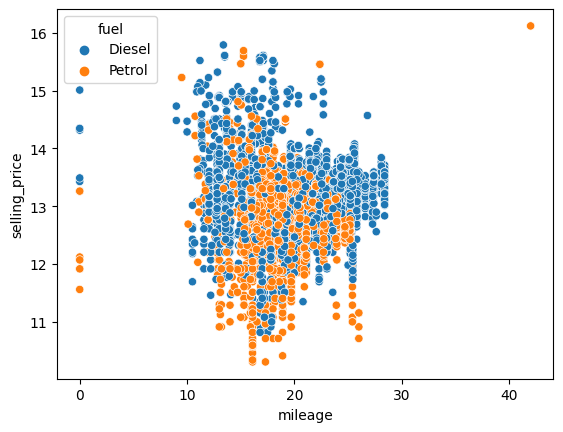

In [74]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

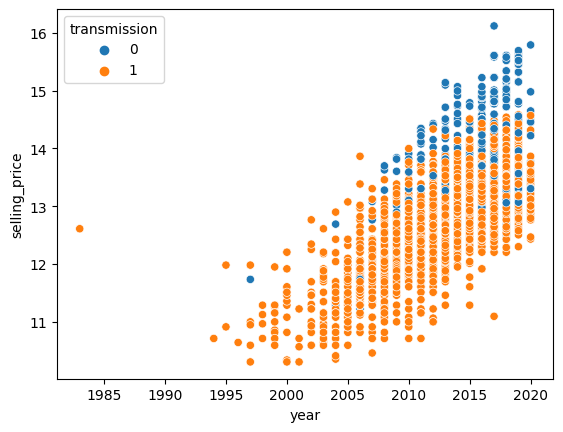

In [75]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

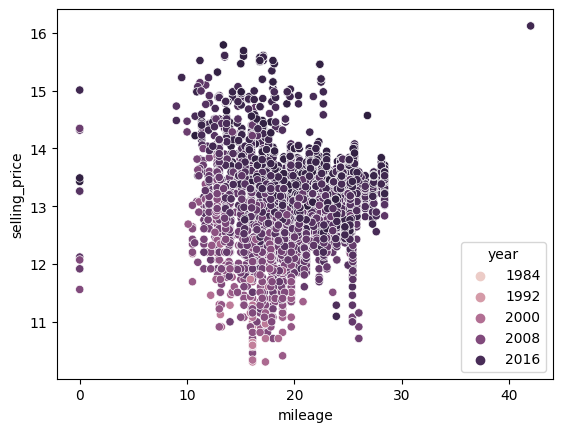

In [76]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['year'])

<Axes: xlabel='year', ylabel='selling_price'>

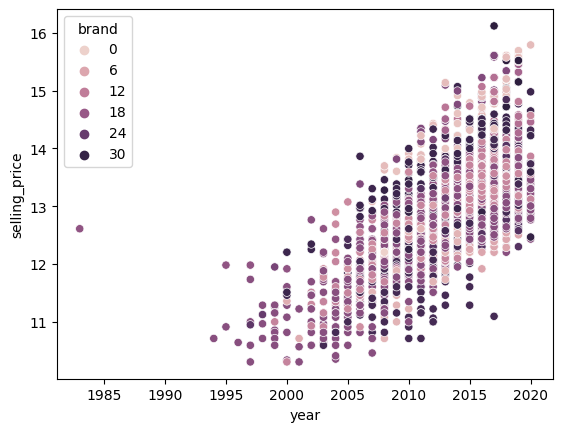

In [77]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['brand'])

<Axes: xlabel='mileage', ylabel='selling_price'>

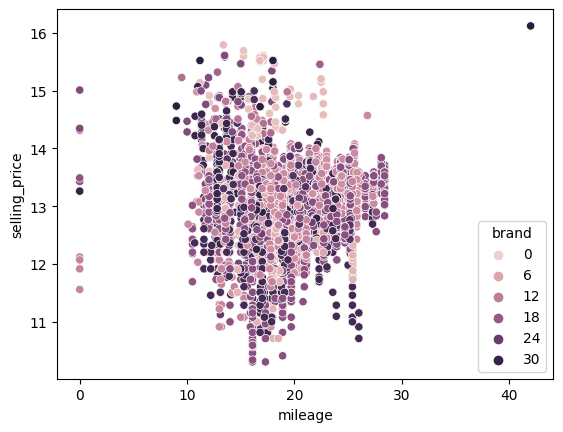

In [78]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['brand'])

<h5>Correlation Matrix</h5>

Correlation matrix is used to find strong factors predicting the life expectancy. It's also for checking features are too correlated.

<Axes: >

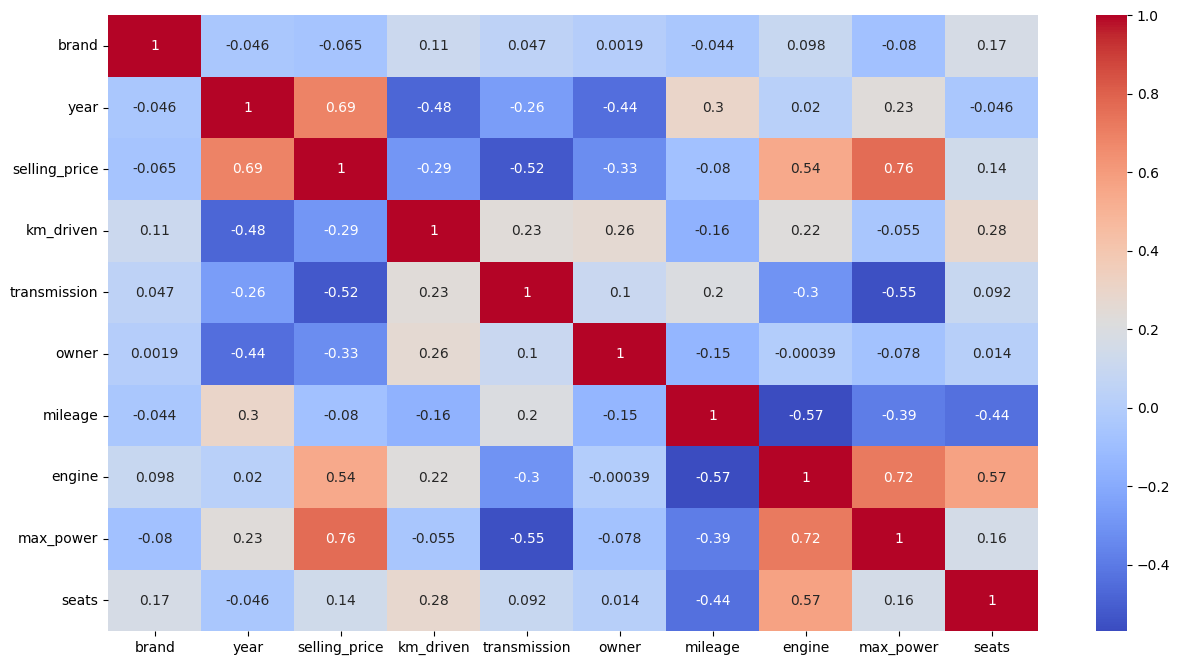

In [79]:
#Check out heatmap
plt.figure (figsize = (15,8))
my_df = df.select_dtypes (exclude = [object])
sns.heatmap (my_df.corr(), annot = True, cmap = 'coolwarm')

<h4>Predictive Power Score</h4>

In [80]:
import ppscore as pps

#before using pps

<Axes: xlabel='x', ylabel='y'>

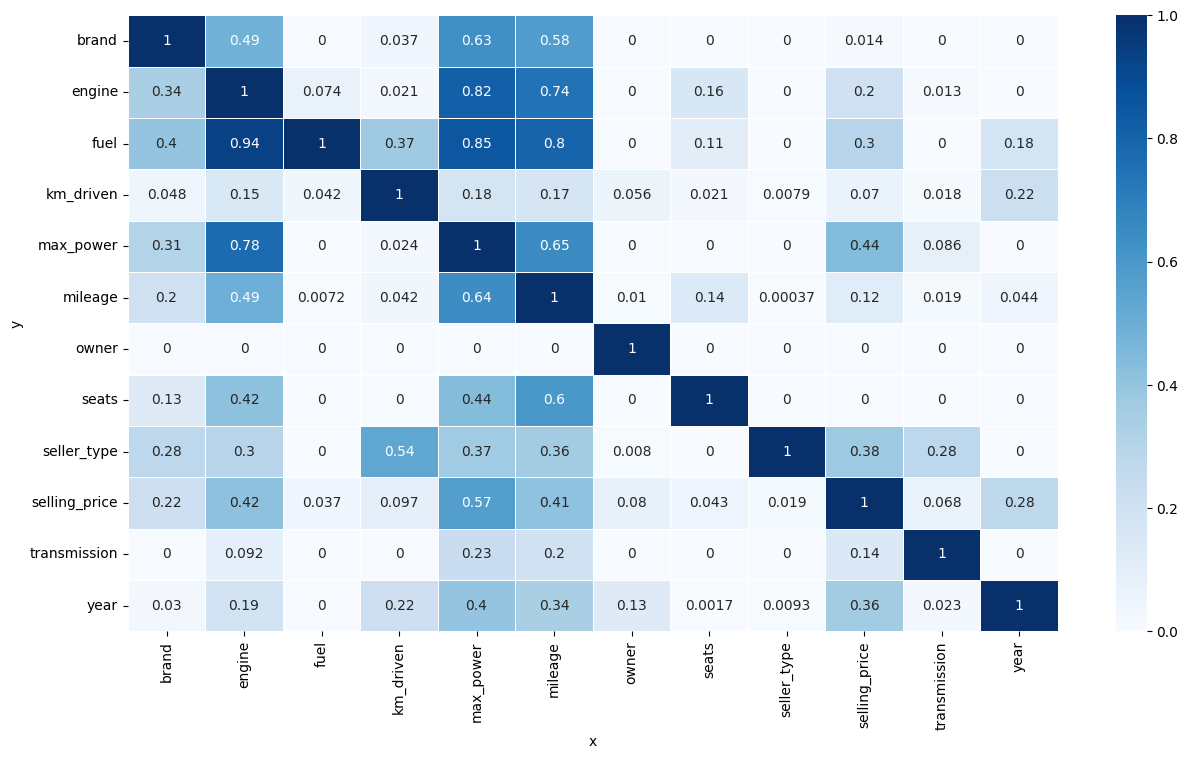

In [81]:

#ppscore_df = df.select_dtypes (exclude = [object])
matrix_df = pps.matrix(df)[['x','y','ppscore']].pivot (columns='x', index = 'y', values= 'ppscore')

#plot
plt.figure (figsize = (15,8))
sns.heatmap (matrix_df, vmin = 0, vmax = 1, cmap = "Blues", linewidths = 0.5, annot = True)

<h3>3. Feature Engineering</>

<h3>4. Feature Selection</h3>

In [82]:
#x is strong features
X = df[['brand','mileage','year']]

#y is the selling_price label
y = df['selling_price']


<h5>Train Test Split</h5>

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 16)

<h4>Preprocessing</h4>

<h5>Null Values</h5>

In [84]:
#check for null vaules in train set
X_train[['brand','mileage','year']].isna().sum()

brand       0
mileage    91
year        0
dtype: int64

In [85]:
#check for null values in test set
X_test[['brand','mileage','year']].isna().sum()

brand       0
mileage    38
year        0
dtype: int64

In [86]:
y_train.isna().sum()

0

In [87]:
y_test.isna().sum()

0

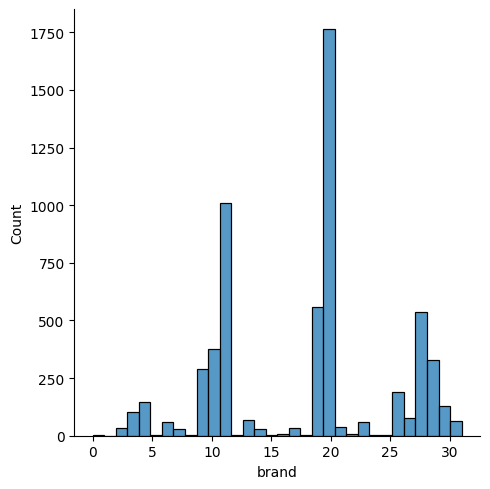

In [88]:
sns.displot (data=df, x='brand')

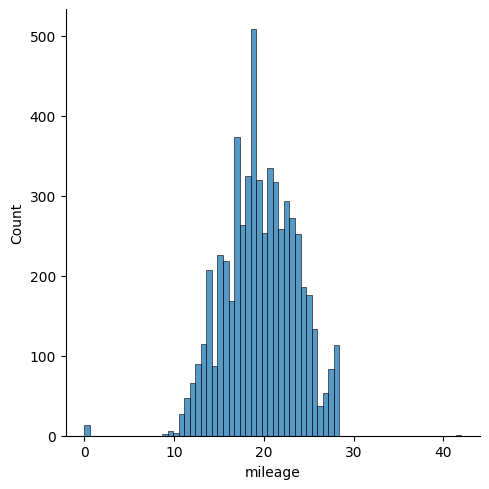

In [89]:
sns.displot(data = df, x = 'mileage')

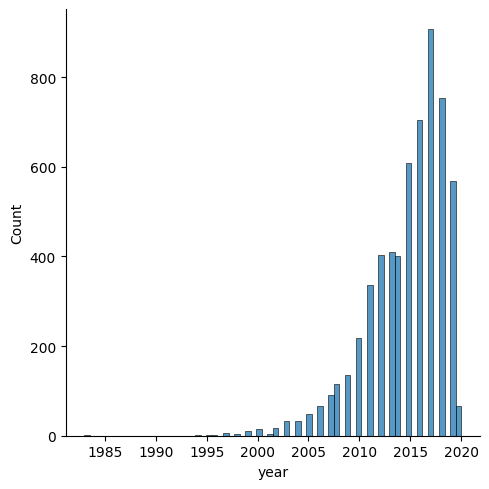

In [90]:
sns.displot(data = df, x = 'year')

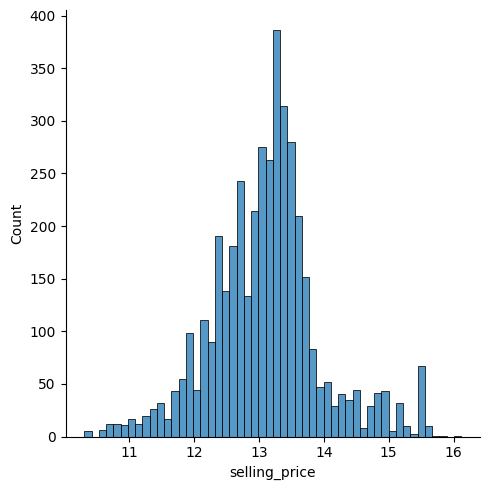

In [91]:
sns.displot(y_train)

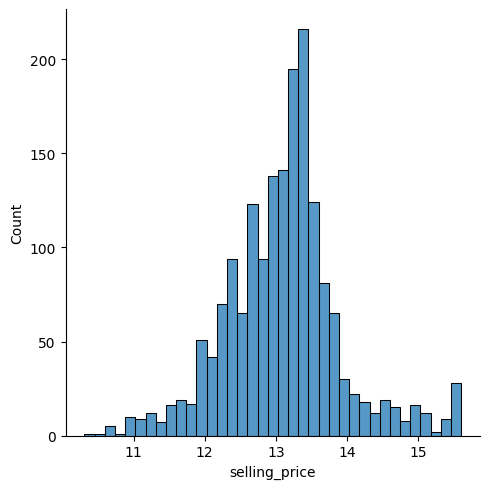

In [92]:
sns.displot(y_test)

In [93]:
#After checking the null values for my features: 'transmission' and 'max_power', only 'max_power' feature has the null values.
# for the max_power, I will fill with median value, because we already 
#syntax df.fillna (value = none, method=none, axis = none, inplace = false, limit = none, downcase = none)
#X_train['max_power'].fillna ()

X_train['mileage'].fillna(X_train['mileage'].median(),inplace = True)
X_test['mileage'].fillna(X_train['mileage'].median(),inplace = True)

#for our label that is selling_price, there is no null value.

In [94]:
#check
X_train.isna().sum()

brand      0
mileage    0
year       0
dtype: int64

In [95]:
#check
X_test.isna().sum()

brand      0
mileage    0
year       0
dtype: int64

<h5>Checking Outliers</h5>

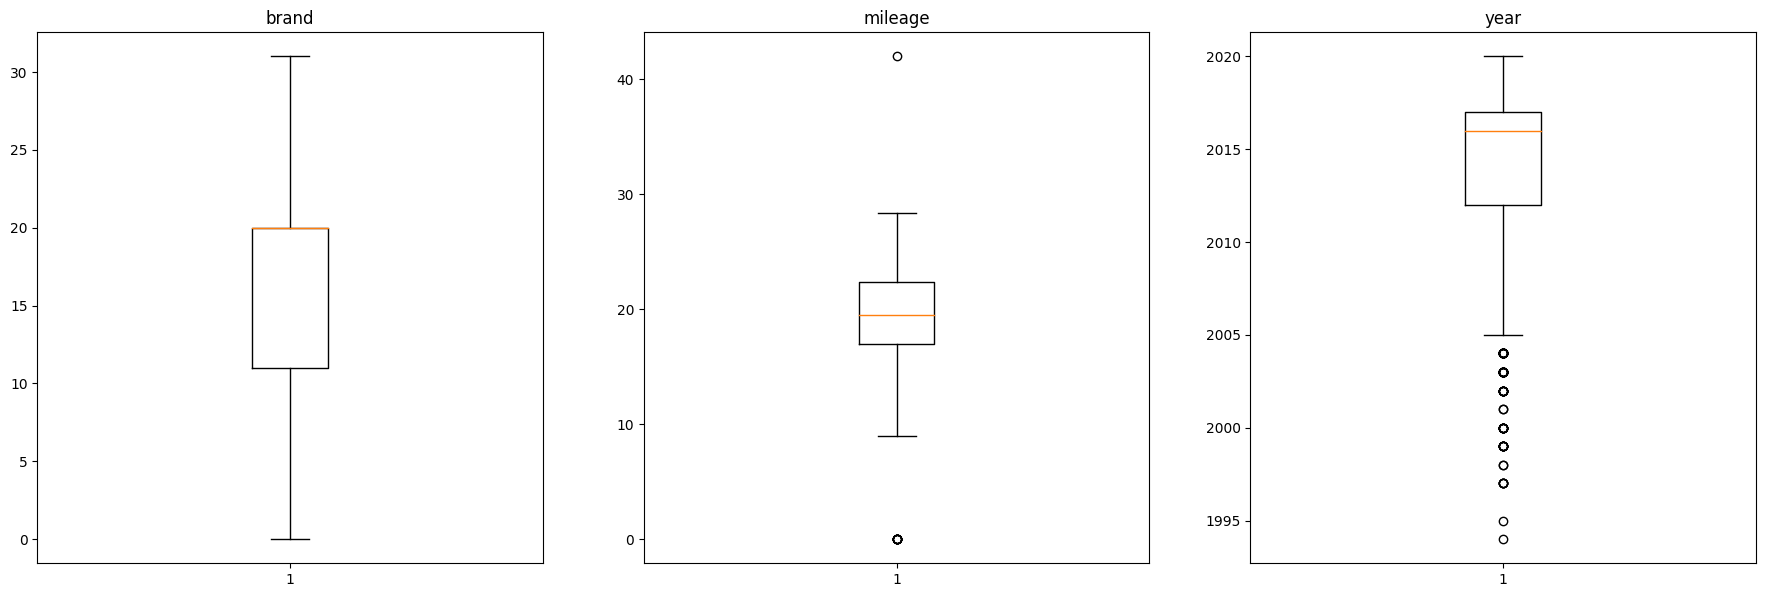

In [96]:
#Create a dictionary of columns
col_dict = {'brand':1, 'mileage':2, 'year':3}

#detect outliers in each variable using box plots
plt.figure(figsize=(30,40))
           
for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    
    plt.title(variable)
plt.show()
    

In [97]:
def outlier_count(col, data = X_train):
    
    #calculate 25% quatile and 75% quatile
    q75, q25 = np.percentile (data[col],[75,25])
    
    #calculate your inter quatile
    iqr = q75-q25
    
    #min_val and max_val
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    
    #count number of outliers, which are the data that are less than min_val and more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    #calculate the percentage of the outliers
    outlier_percent = round (outlier_count/len(data[col])*100,2)
    
    if(outlier_count > 0):
        print("\n" + 15*"-" + col + 15*'-' + "\n")
        print ('Number of outliers: {}'.format (outlier_count))
        print ('Percentage of data that is outlier : {}'.format(outlier_percent))

In [98]:
for col in X_train.columns:
    outlier_count(col)


---------------mileage---------------

Number of outliers: 11
Percentage of data that is outlier : 0.26

---------------year---------------

Number of outliers: 90
Percentage of data that is outlier : 2.16


<h3>Scaling </h3>

In [99]:
from sklearn.preprocessing import StandardScaler

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [100]:
#check the shape of all X_train, y_train, y_test
print ("Shape of X_train: ", X_train.shape)
print ("Shape of X_test: ", X_test.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of y_test: ", y_test.shape)


Shape of X_train:  (4172, 3)
Shape of X_test:  (1788, 3)
Shape of y_train:  (4172,)
Shape of y_test:  (1788,)


<h3> Modelling </h3>

<h4> ML Flow </h4>

In [101]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:9090")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "kyithinnu"
# mlflow.create_experiment(name="kyi-a2-carpriceprediction")  #create if you haven't create
mlflow.set_experiment(experiment_name = "kyi-a2-carpriceprediction")

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1694358757715, experiment_id='0', last_update_time=1694363180439, lifecycle_stage='active', name='kyi-a2-carpriceprediction', tags={}>

<h4>Linear Regression</h4>

In [118]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, theta='zeros', use_momentum=False, momentum=0.9, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.theta  = theta
        self.use_momentum = use_momentum    #momentum value (0, 1)
        self.momentum = momentum
        self.prev_step=0
        
    # calculate mse
    
    def mse(self, ypred, ytrue):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    # calculate r2score
    def r2score(self, ypred, ytrue):
        return 1 - ((((ytrue - ypred)**2).sum()) / (((ytrue - ytrue.mean())**2).sum()))
    
    """
    Calculate the R-squared (R2) score.

    Parameters:
    ytrue: actual_labels_values
    ypred: predicted_labels_values

    Returns:
    float: The R2 score.
    """
    # average mse after all folds
    def avgMSE(self): 
        return np.sum(np.array(self.kfold_scores_mse))/len(self.kfold_scores_mse)
    
    # average r2socre after all folds
    def avgR2score(self): 
        return np.sum(np.array(self.kfold_scores_r2score))/len(self.kfold_scores_r2score)
    
    
    # train test split
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores_mse = list()
        self.kfold_scores_r2score = list()
        
        #reset val loss
        self.val_loss_old = np.infty
        
        #kfold.split in the sklearn.....
        #3 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            # --- choose theta between zeros initialization or xavier ---
            # set theta by xavier method
            if self.theta[0] == 'xavier':
                # for xavier weight initialization
                m = X_cross_train.shape[0]    # define number of samples according to the train dataset
                print(f"number of sample:{m}")
                
                # calculate the range for the weights
                lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
                # summarize the range
                print(lower , upper)
                
                # randomly pick weights within this range
                numbers = np.random.rand(X_cross_train.shape[1])     # generate random numbers according to the number of selected features
                scaled = lower + numbers * (upper - lower)
                print(scaled)
                self.theta = scaled
                
            # set theta by zeros
            else :
                self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    # stochastic
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            # train_loss = self._train(X_method_train, y_method_train)
                            mse_loss, r2score_loss = self._train(X_method_train, y_method_train)
                            
                    # minibatch
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            # train_loss = self._train(X_method_train, y_method_train)
                            mse_loss, r2score_loss = self._train(X_method_train, y_method_train)
                    
                    # batch
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        # train_loss = self._train(X_method_train, y_method_train)
                        mse_loss, r2score_loss = self._train(X_method_train, y_method_train)
                    
                    # record mse and r2score for each epoch
                    mlflow.log_metric(key="train_mse_loss", value=mse_loss, step=epoch)
                    mlflow.log_metric(key="train_r2score_loss", value=r2score_loss, step=epoch)

                    # predict for each epoch
                    yhat_val = self.predict(X_cross_val)
                    # mse
                    val_loss_new_mse = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss_mse", value=val_loss_new_mse, step=epoch)
                    # r2score
                    val_loss_new_r2score = self.r2score(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss_r2score", value=val_loss_new_r2score, step=epoch)
                    
                    #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new_mse, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new_mse
                    
                # record fold mse score
                self.kfold_scores_mse.append(val_loss_new_mse)
                print(f"Fold {fold} mse: {val_loss_new_mse}")
                
                # record fold r2score
                self.kfold_scores_r2score.append(val_loss_new_r2score)
                print(f"Fold {fold} r2score: {val_loss_new_r2score}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]      
        
        if self.regularization is None:
            grad = (1 / m) * X.T @ (yhat - y)
        else:  
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        step = self.lr * grad
        
        # self.theta = self.theta - self.lr * grad
        
        if self.use_momentum:   # if momentumm is used
            self.theta = self.theta - step + self.momentum * self.prev_step
            self.prev_step = step
        
        else:   # if momentum is not used
            self.theta = self.theta - step
            
        mse_loss = self.mse(yhat, y)
        r2_score = self.r2score(yhat, y)
        return mse_loss, r2_score  # Return both MSE and R2
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    # ------Modify the plot_feature_importance method to use _coef
    def plot_feature_importance(self, X):
        if not hasattr(self, 'theta'):
            raise ValueError("Model not trained yet. Call 'fit' method first.")

        if X.shape[1] != self.theta.shape[0]:
            raise ValueError("Number of features in X must match the number of coefficients.")

        # Get the column names (feature names) from the DataFrame
        feature_names = X.columns.tolist()

        # Calculate the absolute magnitude of coefficients as feature importance
        feature_importance = np.abs(self.theta.squeeze())

        # Create a horizontal bar plot to display feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance)
        plt.xlabel('Feature Importance (Absolute Magnitude of Coefficients)')
        plt.title('Feature Importance')
        plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
        plt.show()
        

<h4> Others </h4>

Now we can create Ridge, Lasso and Elastic class that extends the LinearRegression, with added penalty.

In [128]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method,theta, use_momentum, momentum, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, theta, use_momentum, momentum,lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, theta, use_momentum, momentum,lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, theta, use_momentum, momentum,lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, theta, use_momentum, momentum, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        # def __init__(self, regularization, theta='zeros', use_momentum=False, momentum=0.9, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        super().__init__(self.regularization, theta, use_momentum,momentum, lr, method )
        
# class polynomial(LinearRegression):
#     def __init__(self, method, theta, use_momentum, momentum, lr, l, l_ratio=0.5):
#         self.regularization = Ridge()
#         # def __init__(self, regularization, theta='zeros', use_momentum=False, momentum=0.9, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
#         super().__init__(self.regularization, theta, use_momentum,momentum, lr, method )
# class polynomial(LinearRegression):
#     def __init__(self, method, theta, use_momentum, momentum, lr, l, l_ratio=0.5):
#         self.regularization = Lasso()
#         # def __init__(self, regularization, theta='zeros', use_momentum=False, momentum=0.9, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
#         super().__init__(self.regularization, theta, use_momentum,momentum, lr, method )

class Normal(LinearRegression):  
    def init(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().init(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)

In [104]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

<h3> Experiment </h3>

In [ ]:
# stop here code before doing expirement 
# stop here

In [121]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import mlflow

# (1) Define Regularization Method: Polynomial, Lasso, Ridge, Normal
regs = ["Ridge", "Lasso", "polynomial", "normal"]

# (2) Define Momentum
use_momentums = ["True", "False"]

# (3) Define method: sto, batch, mini
methods = ["stochastic", "batch", "minibatch"]

# (4) Define theta:
thetas = ["zeros", "xavier"]

# (5) Define learning rate:
lrs = [0.01, 0.001, 0.0001]

# Hyperparameter combination for expirement
hyperparameter_combinations = []

for use_momentum in use_momentums:
    for method in methods:
        for theta in thetas:
            for lr in lrs:
                params = {
                    "method": method,
                    "lr": lr,
                    "use_momentum": use_momentum == "True",
                    "momentum": 0.9,
                    "theta": theta,
                    "l": 0.1
                }

                hyperparameter_combinations.append(params)

# Loop through hyperparameter combinations
for reg in regs:
    for params in hyperparameter_combinations:
        print(params)
        with mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-theta-{params['theta']}-momentum-{params['momentum']}-reg-{reg}", nested=True):
            mlflow.log_params(params=params)
            print("=" * 5, reg, "=" * 5)
            print("method: ", params['method'])
            print("lr: ", params['lr'])
            print("use_momentum:", params['use_momentum'])
            print("theta :", params['theta'])

            if reg == 'normal':
                model = LinearRegression(regularizaiton = None)
                model.fit(X_train, y_train.values)
                # break
            elif reg == 'polynomial':
                poly_X_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
                poly_X_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
                
                model = LinearRegression(regularization=None)
                model.fit(poly_X_train, y_train.values)
            else:
                type_of_regression = str_to_class(reg)
                model = type_of_regression(**params)
                model.fit(X_train, y_train.values)
            
            # record average MSE and R2score for each hyper-parameter
            test_mse = model.avgMSE()  
            test_r2score = model.avgR2score()

            print("Test MSE: ", test_mse)
            mlflow.log_metric(key="test_mse", value=test_mse)

            print("Test R2 score: ", test_r2score)
            mlflow.log_metric(key="test_r2score", value=test_r2score)

            if reg == 'polynomial':
                signature = mlflow.models.infer_signature(X_train, model.predict(poly_X_train))
            else:
                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                
            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()


{'method': 'stochastic', 'lr': 0.01, 'use_momentum': True, 'momentum': 0.9, 'theta': 'zeros', 'l': 0.1}
===== Ridge =====
method:  stochastic
lr:  0.01
use_momentum: True
theta : zeros
Fold 0 mse: 173.3574496694346
Fold 0 r2score: -4954486.061594028
Fold 1 mse: 171.81292452703659
Fold 1 r2score: -12795879.130671555
Fold 2 mse: 172.29650588096987
Fold 2 r2score: -11521787.364876915
Test MSE:  172.48896002581367
Test R2 score:  -9757384.185714167
{'method': 'stochastic', 'lr': 0.001, 'use_momentum': True, 'momentum': 0.9, 'theta': 'zeros', 'l': 0.1}
===== Ridge =====
method:  stochastic
lr:  0.001
use_momentum: True
theta : zeros
Fold 0 mse: 173.36449678322006
Fold 0 r2score: -484952952.23767996
Fold 1 mse: 171.81291400022093
Fold 1 r2score: -1277425665.929297
Fold 2 mse: 172.29244623548192
Fold 2 r2score: -1120207026.7117271
Test MSE:  172.489952339641
Test R2 score:  -960861881.6262347
{'method': 'stochastic', 'lr': 0.0001, 'use_momentum': True, 'momentum': 0.9, 'theta': 'zeros', 'l': 

<h3> Save Model </h3>

In [141]:
params = {
            "method": "minibatch",
            "lr": 0.0001,
            "use_momentum": True,  # Convert to bool
            "momentum": 0.9,
            "theta": "xavier",
            "l": 0.1
        }
type_of_regression = str_to_class("Ridge")
model_v1 = type_of_regression(**params)

model_v1.fit(X_train, y_train.values)


Fold 0 mse: 173.36521186616307
Fold 0 r2score: -48392156291.66346
Fold 1 mse: 171.8129093951636
Fold 1 r2score: -127718760043.23076
Fold 2 mse: 172.29203353422113
Fold 2 r2score: -111706495570.53882


<h3> Testing </h3>

In [143]:
yhat = model.predict (X_test)
mse = model.mse (y_test, yhat)
r2score = model.r2score (y_test, yhat)

In [144]:
print(f"mse ={mse}")
print(f"r2score:'{r2score}")

mse =172.33322718492158
r2score:'-124841779.50314748


In [113]:
X

,brand,mileage,year
0,20,23.40,2014
2,10,17.70,2006
3,11,23.00,2010
4,20,16.10,2007
5,11,20.14,2017
...,...,...,...
8123,11,18.50,2013
8124,11,16.80,2007
8125,20,19.30,2009
8126,28,23.57,2013


<h3> Analysis of Feature Importances </h3>

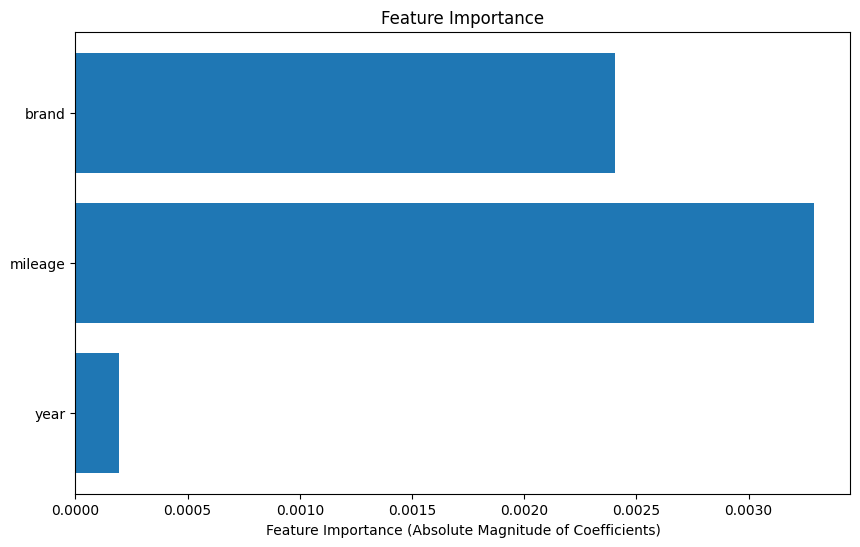

In [112]:
# Plot feature importance
model_v1.plot_feature_importance(X)

<h3> Inference </h3>

In [145]:
import pickle
# save the model to disk
modelname ='A2CarPricePrediction.model'
model = {
    'model': model_v1,
    'scaler' : scaler
}
pickle.dump (model, open(modelname,'wb'))

In [146]:
# pickle load_ test with own data
loaded_model = pickle.load (open (modelname, 'rb'))
model = loaded_model['model']
scaler = loaded_model['scaler']

In [147]:
# df['selling_price'] = np.exp (df['selling_price'])
df[['mileage','year','brand','selling_price']].loc[2]

mileage            17.70000
year             2006.00000
brand              10.00000
selling_price      11.97035
Name: 2, dtype: float64

In [148]:
#try to create one example
# transform predicted y value back to original value
sample = np.array([[17,2006,10]])
sample = scaler.transform (sample)

In [149]:
predicted_car_price_1 = model.predict(sample)
predicted_car_price = np.exp (predicted_car_price_1)
predicted_car_price_1
predicted_car_price

array([1.01810326])

<h2> Summary</h2>

<h4> (1) Feature Selection </h4>
Car price prediction dataset contains the followings features:
<ul>
<li>brand name
<li>year
<li>selling_price
<li>km_driven
<li>fuel
<li>seller_type
<li>transmission
<li>owner
<li>mileage
<li>engine
<li>max_power
<li>torque
<li>seats
</ul>

<br>
<p>Among these features, I believe that attributes such as brand, engine, mileage, transmission, manufacturing year, and kilometers driven are crucial. In the real world, the price of a car is often determined by these features. The type of transmission, whether automatic or manual, can significantly influence the market demand for a car.</p>

<p>Based on my Predictive Power Score (PPS) analysis, I have identified the following features as valuable for my system: 
<ul>
    <li> max_power (0.56) </li>
    <li> engine (0.4) </li>
    <li> mileage (0.4) </li> 
    <li> year (0.37) and </li>
    <li> brand (0.22). 
</ul>
Notably, in alignment with real-world understanding, there are correlations between max_power, mileage, and engine attributes.</p>

<p>Furthermore, I conducted a correlation heatmap analysis to ascertain relationships between features. The heatmap revealed the following notable correlations:</p>

<table>
    <tr>
        <th> Feature1 </th>
        <th> Feature2 </th>
        <th> Correlation </th>
    </tr>
    <tr>
        <td> engine </td>
        <td> year </td>
        <td> 0.017 </td>
    </tr>
    <tr>
        <td> max_power </td>
        <td> year </td>
        <td> 0.23 </td>
    </tr>
     <tr>
        <td> max_power </td>
        <td> mileage </td>
        <td> -0.37 </td>
    </tr>
     <tr>
        <td> mileage </td>
        <td> year </td>
        <td> 0.33 </td>
    </tr>
    <tr>
        <td> mileage </td>
        <td> brand </td>
        <td> 0.2 </td>
    </tr>
    <tr>
        <td> year </td>
        <td> brand </td>
        <td> 0.03 </td>
    </tr>
</table>
<br>

<p>
    In this expirement, I will do the prediction using (brand, year and mileage) features to build my model.
</p>

<h4> (2) About my Experiment</h4>
In this experiment, I conducted a comprehensive analysis of different hyperparameters and their impact on regression models. I explored the following hyperparameters to understand their effects on model performance:
<ul>
    <li>Regression Techniques</li>
    I considered four different regression techniques for my experiment:
        <ol>
            <li> Polynomial Regression: A regression technique that extends linear regression by introducing polynomial features. </li>
            <li> Lasso Regression: Linear regression with L1 regularization, which helps in feature selection. </li>
            <li> Ridge Regression: Linear regression with L2 regularization, which prevents overfitting. </li>
            <li> Normal Regression (Linear Regression): The standard linear regression without regularization. </li>
        </ol>
    <li> Hyperparameter Choices </li>
    For each regression technique, we tested the following hyperparameter combinations:
        <ul> 
            <li> Initialization of Theta:</li>
                <ol>
                    <li> Zero initialization </li>
                    <li> Random initialization using Xavier method </li>
                </ol>
            <li> Cross-Validation Strategies: </li>
                <ol>
                    <li> Stochastic: Updating the model parameters with each data point individually. </li>
                    <li> Mini-batch: Training the model on small random subsets of the data. </li>
                    <li> Batch: Training the model on the entire dataset. </li>
                </ol>
            <li> Use of Momentum: </li>
                <ol>
                    <li> With Momentum: Applying momentum to improve convergence. </li>
                    <li> Without Momentum: Standard gradient descent. </li>
                </ol>
            <li> Learning Rates: </li>
                <ol>
                    <li> 0.01 </li>
                    <li> 0.001 </li>
                    <li> 0.0001 </li>
                </ol>
        </ul>
</ul>

<h4> (3) Results and Analysis </h4>
<h5> MSE and R2score Comparison </h5>
<p> I compared the performance of different hyperparameter combinations based on two key metrics: MSE and R2score. These metrics provide insights into the model's accuracy and goodness of fit.</p>

<p> <i> Here is an analysis of my results according my ML flow: </i></p>
<p> Polynomial: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/poly-head.png'/>
<image alt='' src='source_code/image/poly-head-mser2.png'/>
</p>
<p> Normal: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/normal.png'/>
</p>
<p> Lasso: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/lasso.png'/>
</p>
<p> Ridge: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/ridge.png'/>
</p>

<p></p>

<p>
<b>Records of the best MSE and R2 score according to my model </b>
<table>
    <tr>
        <th> </th>
        <th> Polynomial </th>
        <th> Normal </th>
        <th> Lasso </th>
        <th> Ridge </th>
    </tr>
    <tr>
        <td> l </td>
        <td> 0.1</td>
        <td> 0.1 </td>
        <td> 0.1 </td>
        <td> 0.1 </td>
    </tr>
    <tr>
        <td> lr </td>
        <td> 0.001</td>
        <td> 0.001 </td>
        <td> 0.01 </td>
        <td> 0.001 </td>
    </tr>
    <tr>
        <td> theta </td>
        <td> xavier </td>
        <td> zeros </td>
        <td> zeros </td>
        <td> xavier </td>
    </tr>
     <tr>
        <td> use_momentum </td>
        <td> use </td>
        <td> use </td>
        <td> use </td>
        <td> use </td>
    </tr>
     <tr>
        <td> momentum </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
    </tr>
    <tr>
        <td> Method </td>
        <td> mini batch </td>
        <td> mini batch </td>
        <td> stochastic </td>
        <td> mini batch </td>
    </tr>
    <tr>
        <th> MSE Scores </th>
        <td> 67.49 </td>
        <td> 172.5 </td>
        <td> 172.3 </td>
        <td> 172.3 </td>
    </tr>
    <tr>
        <th> R2 Scores </th>
        <td> -1.229 </td>
        <td> -123073422.4 </td>
        <td> -9821.7 </td>
        <td> -12576 </td>
    </tr>
</table>
</p>

<h4> (4) Conclusion</h4>
This experiment provides valuable insights into the impact of hyperparameters on the performance of regression models. The choice of regression technique, initialization of theta, cross-validation strategy, use of momentum, and learning rate can all influence model performance. It is essential to carefully select hyperparameters based on the specific dataset and problem at hand to achieve the best results.

The use of MLflow for tracking and analyzing these experiments enhances reproducibility and facilitates informed decision-making in the model selection process.

Overall, understanding how different hyperparameters affect regression models is crucial for building accurate and robust predictive models in various applications.

<br><br>
<hr>
<p style="text-align: center;">Thank you for reading</p>
<hr>

